# Getting Started with Kaggle: House Prices Competition

We’ll work through the House Prices: [Advanced Regression Techniques competition](https://www.kaggle.com/c/house-prices-advanced-regression-techniques). 


We’ll follow these steps to a successful Kaggle Competition submesson:

    1- Acquire the data
    2- Explore the data
    3- Engineer and transform the features and the target variable
    4- Build a model
    5- Make and submit predictions


# Step 1: Acquire the data and create our environment

We need to acquire the [data](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data) for the competition. The descriptions of the features and some other helpful information are contained in a file with an obvious name, data_description.txt.

Download the data and save it into a folder where you’ll keep everything you need for the competition.

We will first look at the train.csv data. After we’ve trained a model, we’ll make predictions using the test.csv data.

First, import [FASTAI](https://docs.fast.ai/) library it's a fantastic library.

In [96]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [169]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split



In [94]:
PATH = "Data/House/"

In [4]:
!pwd

/Users/sharaf/Desktop/DS/FastAI/fastai1/courses/ml1


In [95]:
!ls {PATH}

data_description.txt
house-prices-advanced-regression-techniques
house-prices-advanced-regression-techniques 2
house-prices-advanced-regression-techniques.zip
sample_submission.csv
test.csv
tmp
train.csv


### Look at the data

We can use Pandas to read in csv files. The pd.read_csv() method creates a DataFrame from a csv file.

In [190]:
train = pd.read_csv(f'{PATH}train.csv', low_memory=False )

In [191]:
test = pd.read_csv(f'{PATH}test.csv', low_memory=False )

Let’s check out the size of the data.

In [192]:
print ("Train data shape:", train.shape)
print ("Test data shape:", test.shape)

Train data shape: (1460, 81)
Test data shape: (1459, 80)


We see that test has only 80 columns, while train has 81. This is due to, of course, the fact that the test data do not include the final sale price information!

In [193]:
#this is custom function to see all columns 
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

Lets Peek our data

In [194]:
display_all(train.tail().T)

,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,NaN,NaN,NaN,NaN,NaN
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl
Utilities,AllPub,AllPub,AllPub,AllPub,AllPub


We should have the data dictionary available in our folder for the competition. You can also find it [here](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data).
Here’s a brief version of what you’ll find in the data description file:

    SalePrice — the property’s sale price in dollars. This is the target variable that you’re trying to predict.
    MSSubClass — The building class
    MSZoning — The general zoning classification
    LotFrontage — Linear feet of street connected to property
    LotArea — Lot size in square feet
    Street — Type of road access
    Alley — Type of alley access
    LotShape — General shape of property
    LandContour — Flatness of the property
    Utilities — Type of utilities available
    LotConfig — Lot configuration

And so on.

Looking at the data, we see features we expected, like YrSold (the year the home was last sold) and SalePrice. Others we might not have anticipated, such as LandSlope (the slope of the land the home is built upon) and RoofMatl (the materials used to construct the roof). Later, we’ll have to make decisions about how we’ll approach these and other features.

We want to do some plotting during the exploration stage of our project, and we’ll need to import that functionality into our environment as well. Plotting allows us to visualize the distribution of the data, check for outliers, and see other patterns that we might miss otherwise. We’ll use Matplotlib, a popular visualization library.

In [195]:
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

# Step 2: Explore the data and engineer Features

The challenge is to predict the final sale price of the homes. This information is stored in the SalePrice column. The value we are trying to predict is often called the target variable.

We can use Series.describe() to get more information.

In [196]:
train.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Series.describe() gives you more information about any series. count displays the total number of rows in the series. For numerical data, Series.describe() also gives the mean, std, min and max values as well.

The average sale price of a house in our dataset is close to $180,000, with most of the values falling within the $130,000 to $215,000 range.

Next, we’ll check for skewness, which is a measure of the shape of the distribution of values.

When performing regression, sometimes it makes sense to log-transform the target variable when it is skewed. One reason for this is to improve the linearity of the data. Although the justification is beyond the scope of this tutorial, more information can be found [here](https://en.wikipedia.org/wiki/Data_transformation_%28statistics%29).

Importantly, the predictions generated by the final model will also be log-transformed, so we’ll need to convert these predictions back to their original form later.

np.log() will transform the variable, and np.exp() will reverse the transformation.

We use plt.hist() to plot a histogram of SalePrice. Notice that the distribution has a longer tail on the right. The distribution is positively skewed.

Skew is: 1.8828757597682129


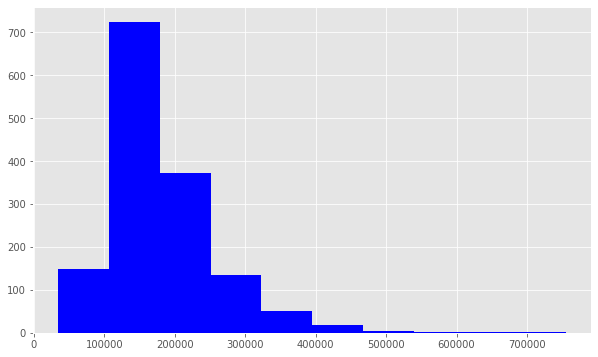

In [197]:
print ("Skew is:", train.SalePrice.skew())
plt.hist(train.SalePrice, color='blue')
plt.show()

as you can see our data is negative skewed 

Now we use np.log() to transform train.SalePric and calculate the skewness a second time, as well as re-plot the data. A value closer to 0 means that we have improved the skewness of the data. We can see visually that the data will more resembles a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution).

Skew is: 0.12133506220520406


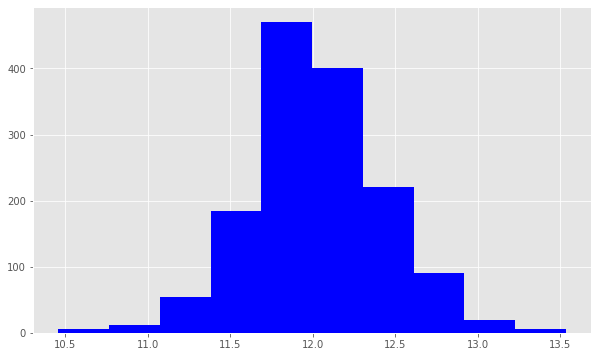

In [198]:
target = np.log(train.SalePrice)
print ("Skew is:", target.skew())
plt.hist(target, color='blue')
plt.show()

Now that we’ve transformed the target variable, let’s consider our features. First, we’ll check out the numerical features and make some plots. The .select_dtypes() method will return a subset of columns matching the specified data types.

## Working with Numeric Features

In [199]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Id                 int64
MSSubClass         int64
LotFrontage      float64
LotArea            int64
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
MasVnrArea       float64
BsmtFinSF1         int64
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
1stFlrSF           int64
2ndFlrSF           int64
LowQualFinSF       int64
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Fireplaces         int64
GarageYrBlt      float64
GarageCars         int64
GarageArea         int64
WoodDeckSF         int64
OpenPorchSF        int64
EnclosedPorch      int64
3SsnPorch          int64
ScreenPorch        int64
PoolArea           int64
MiscVal            int64
MoSold             int64
YrSold             int64
SalePrice          int64
dtype: object

The DataFrame.corr() method displays the correlation (or relationship) between the columns. We’ll examine the correlations between the features and the target.

In [200]:
corr = numeric_features.corr()
print (corr['SalePrice'].sort_values(ascending=False)[:5], '\n')
print (corr['SalePrice'].sort_values(ascending=False)[-5:])

SalePrice      1.000000
OverallQual    0.790982
GrLivArea      0.708624
GarageCars     0.640409
GarageArea     0.623431
Name: SalePrice, dtype: float64 

YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


The first five features are the most [positively correlated](https://en.wikipedia.org/wiki/Correlation_and_dependence) with SalePrice, while the next five are the most negatively correlated.

Let’s dig deeper on OverallQual. We can use the .unique() method to get the unique values.

In [201]:
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2])

The OverallQual data are integer values in the interval 1 to 10 inclusive.

We can create a pivot table to further investigate the relationship between OverallQual and SalePrice. The Pandas docs demonstrate how to accomplish this task. We set index='OverallQual' and values='SalePrice'. We chose to look at the median here.

In [202]:
quality_pivot = train.pivot_table(index='OverallQual',
                  values='SalePrice', aggfunc=np.median)
quality_pivot

,SalePrice
OverallQual,
1,50150
2,60000
3,86250
4,108000
5,133000
6,160000
7,200141
8,269750
9,345000


To help us visualize this pivot table more easily, we can create a bar plot using the Series.plot() method.

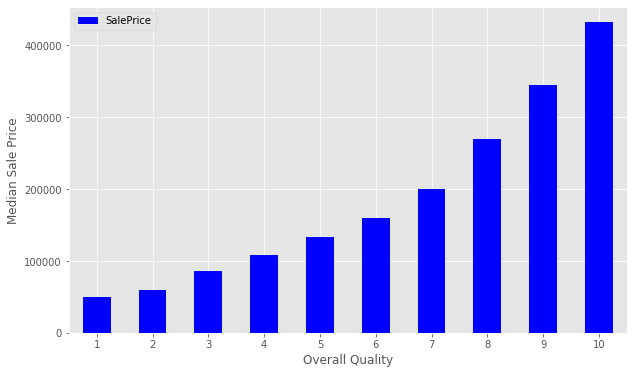

In [203]:
quality_pivot.plot(kind='bar', color='blue')
plt.xlabel('Overall Quality')
plt.ylabel('Median Sale Price')
plt.xticks(rotation=0)
plt.show()

Notice that the median sales price strictly increases as Overall Quality increases.

Next, let’s use plt.scatter() to generate some scatter plots and visualize the relationship between the Ground Living Area GrLivArea and SalePrice.

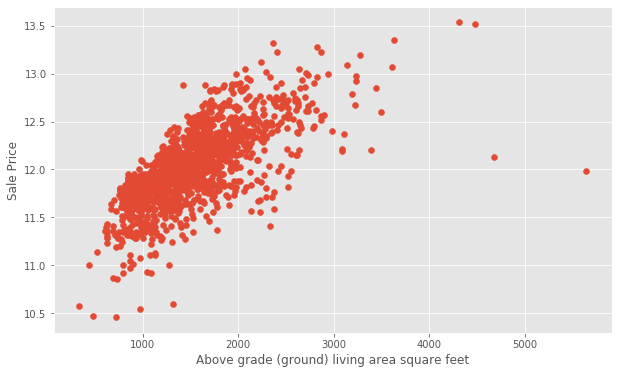

In [204]:
plt.scatter(x=train['GrLivArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Above grade (ground) living area square feet')
plt.show()

At first glance, we see that increases in living area correspond to increases in price. We will do the same for GarageArea.

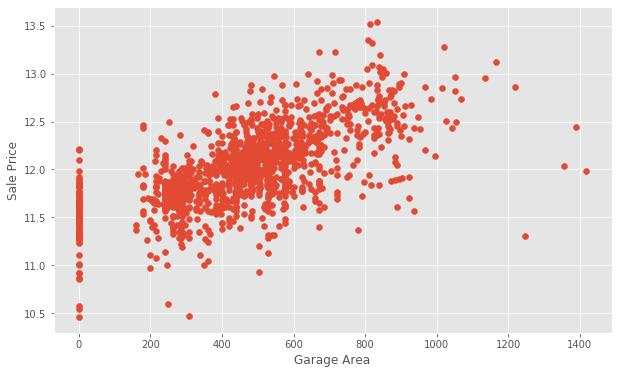

In [205]:
plt.scatter(x=train['GarageArea'], y=target)
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

Notice that there are many homes with 0 for Garage Area, indicating that they don’t have a garage. We’ll transform other features later to reflect this assumption. There are a few outliers as well. Outliers can affect a regression model by pulling our estimated regression line further away from the true population regression line. So, we’ll remove those observations from our data. Removing outliers is an art and a science. There are many techniques for dealing with outliers.

We will create a new dataframe with some outliers removed.

In [206]:
train = train[train['GarageArea'] < 1200]

Let’s take another look.

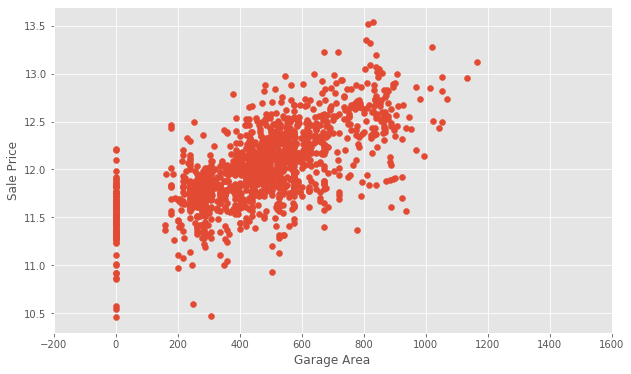

In [207]:
plt.scatter(x=train['GarageArea'], y=np.log(train.SalePrice))
plt.xlim(-200,1600) # This forces the same scale as before
plt.ylabel('Sale Price')
plt.xlabel('Garage Area')
plt.show()

## Handling Null Values

Next, we’ll examine the null or missing values.

We will create a DataFrame to view the top null columns. Chaining together the train.isnull().sum() methods, we return a Series of the counts of the null values in each column.

In [208]:
display_all(train.isnull().sum().sort_index()/len(train))

1stFlrSF         0.000000
2ndFlrSF         0.000000
3SsnPorch        0.000000
Alley            0.937457
BedroomAbvGr     0.000000
BldgType         0.000000
BsmtCond         0.025430
BsmtExposure     0.026117
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtFinType1     0.025430
BsmtFinType2     0.026117
BsmtFullBath     0.000000
BsmtHalfBath     0.000000
BsmtQual         0.025430
BsmtUnfSF        0.000000
CentralAir       0.000000
Condition1       0.000000
Condition2       0.000000
Electrical       0.000687
EnclosedPorch    0.000000
ExterCond        0.000000
ExterQual        0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
Fence            0.806873
FireplaceQu      0.473540
Fireplaces       0.000000
Foundation       0.000000
FullBath         0.000000
Functional       0.000000
GarageArea       0.000000
GarageCars       0.000000
GarageCond       0.055670
GarageFinish     0.055670
GarageQual       0.055670
GarageType       0.055670
GarageYrBlt      0.055670
GrLivArea   

The documentation can help us understand the missing values. In the case of PoolQC, the column refers to Pool Quality. Pool quality is NaN when PoolArea is 0, or there is no pool.
We can find a similar relationship between many of the Garage-related columns.

Let’s take a look at one of the other columns, MiscFeature. We’ll use the Series.unique() method to return a list of the unique values.

In [209]:
print ("Unique values are:", train.MiscFeature.unique())

Unique values are: [nan 'Shed' 'Gar2' 'Othr' 'TenC']


These values describe whether or not the house has a shed over 100 sqft, a second garage, and so on. We might want to use this information later. It’s important to gather domain knowledge in order to make the best decisions when dealing with missing data.

## Transforming and engineering features

When transforming features, it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.

Our model expects that the shape of the features from the train set match those from the test set. This means that any feature engineering that occurred while working on the train data should be applied again on the test set.

Also the categorical variables are currently stored as strings, which is inefficient, and doesn't provide the numeric coding required for a random forest. 

We're still not quite done - for instance we have lots of missing values, which we can't pass directly to a random forest. 

But let's save this file for now, since it's already in format can we be stored and accessed efficiently.

In [113]:
#Lets drop all columns with heigh null valuses and ID column
#train.drop(['Alley','Fence','MiscFeature','PoolQC','Id'], axis=1,inplace=True)
#test.drop(['Alley','Fence','MiscFeature','PoolQC','Id'], axis=1,inplace=True)

In [215]:
os.makedirs('tmp', exist_ok=True)
train.reset_index().to_feather('tmp/house-raw')
test.reset_index().to_feather('tmp/test-raw')

In [216]:
#In the future we can simply read it from this fast format.
train_raw = pd.read_feather('tmp/house-raw')
test_raw=pd.read_feather('tmp/test-raw')

In [217]:
display_all(train_raw.tail().T)

,1450,1451,1452,1453,1454
index,1455,1456,1457,1458,1459
Id,1456,1457,1458,1459,1460
MSSubClass,60,20,70,20,20
MSZoning,RL,RL,RL,RL,RL
LotFrontage,62,85,66,68,75
LotArea,7917,13175,9042,9717,9937
Street,Pave,Pave,Pave,Pave,Pave
Alley,None,None,None,None,None
LotShape,Reg,Reg,Reg,Reg,Reg
LandContour,Lvl,Lvl,Lvl,Lvl,Lvl


We'll replace categories with their numeric codes, handle missing continuous values, and split the dependent variable into a separate variable. 

using proc_df() function this function takes a data frame and splits off the response variable, and changes the df into an entirely numeric dataframe.
Categories are converted into numeric labels and this is what we're trying to achive , If interested, take a look at proc_df function at https://github.com/fastai/fastai/blob/master/fastai/structured.py

In [218]:
df, y, nas = proc_df(train_raw, 'SalePrice')
# again it’s important to remember that any transformations that you’ve applied to the training data before fitting the model must be applied to the test data.
df_test ,_, nas = proc_df(test_raw,na_dict=nas)

In [219]:
sum(df.isnull().sum() != 0) , sum(df_test.isnull().sum() != 0)

(0, 0)

We now have something we can pass to our model, bet befor that let’s perform the final steps to prepare our data for modeling. We’ll separate the features and the target variable for modeling. We will assign the features to X and the target variable to y. We use np.log() as explained above to transform the y variable for the model. data.drop([features], axis=1) tells pandas which columns we want to exclude. We won’t include  Id is just an index with no relationship to SalePrice.

In [240]:
df_x=df.drop(['Id'], axis=1)
#Also we should remove ID from our test data
df_test.drop(['Id'], axis=1 , inplace=True)
df_y=np.log1p(y)

# Step 3 : Build a Random Forest model

Let’s partition the data and start modeling.
We will use the train_test_split() function from scikit-learn to create a training set and a hold-out set. Partitioning the data in this way allows us to evaluate how our model might perform on data that it has never seen before. If we train the model on all of the test data, it will be difficult to tell if overfitting has taken place.

train_test_split() returns four objects:

    X_train is the subset of our features used for training.
    X_test is the subset which will be our ‘hold-out’ set – what we’ll use to test the model.
    y_train is the target variable SalePrice which corresponds to X_train.
    y_test is the target variable SalePrice which corresponds to X_test.

The first parameter value X denotes the set of predictor data, and y is the target variable. Next, we set random_state=42. This provides for reproducible results, since sci-kit learn’s train_test_split will randomly partition the data. The test_size parameter tells the function what proportion of the data should be in the test partition. In this example, about 33% of the data is devoted to the hold-out set.

In [241]:
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)

## Begin modelling

We will first create a Random Forest model. First, we instantiate the model.

In [242]:
rf = RandomForestRegressor(n_estimators=160, max_features=0.5, n_jobs=-1, oob_score=True)

Next, we need to fit the model. First instantiate the model and next fit the model. Model fitting is a procedure that varies for different types of models. Put simply, we are estimating the relationship between our predictors and the target variable so we can make accurate predictions on new data.

We fit the model using X_train and y_train, and we’ll score with X_test and y_test. The rf.fit() method will fit the random forest on the features and target variable that we pass.

In [243]:
%time rf.fit(X_train, y_train)

CPU times: user 1.49 s, sys: 143 ms, total: 1.63 s
Wall time: 431 ms


RandomForestRegressor(max_features=0.5, n_estimators=160, n_jobs=-1,
                      oob_score=True)

# Evaluate the performance and visualize results

Now, we want to evaluate the performance of the model.
Each competition might evaluate the sublessons differently. In this competition, Kaggle will evaluate our sublesson using root-mean-squared-error (RMSE). We’ll also look at The r-squared value. The r-squared value is a measure of how close the data are to the fitted regression line. It takes a value between 0 and 1, 1 meaning that all of the variance in the target is explained by the data. In general, a higher r-squared value means a better fit.

The model.score() method returns the r-squared value by default.

In [244]:
print ("R^2 is: \n", rf.score(X_test, y_test))

R^2 is: 
 0.8932418941402414


This means that our features explain approximately 89% of the variance in our target variable.

Next, we’ll consider rmse. To do so, use the model we have built to make predictions on the test data set.

The model.predict() method will return a list of predictions given a set of predictors. Use model.predict() after fitting the model.

The mean_squared_error function takes two arrays and calculates the rmse.

In [245]:
predictions = rf.predict(df_test)

In [247]:
print ('RMSE is: \n', mean_squared_error(y_test,rf.predict(X_test)))

RMSE is: 
 0.017044236414328943


# To do 
Make a submission and Lets see you on Leaderboard